In [47]:
## Q2.
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pokemon_index_dict = {
    "Bug":0,
    "Dark":1,
    "Dragon":2,
    "Electric":3,
    "Fairy":4,
    "Fighting":5,
    "Fire":6,
    "Flying":7,
    "Ghost":8,
    "Grass":9,
    "Ground":10,
    "Ice":11,
    "Normal":12,
    "Poison":13,
    "Psychic":14,
    "Rock":15,
    "Steel":16,
    "Water":17
}

In [49]:
pokemon_type_list = [
    "Bug",
    "Dark",
    "Dragon",
    "Electric",
    "Fairy",
    "Fighting",
    "Fire",
    "Flying",
    "Ghost",
    "Grass",
    "Ground",
    "Ice",
    "Normal",
    "Poison",
    "Psychic",
    "Rock",
    "Steel",
    "Water"
]

In [50]:
# User input for image resolution
px = 128 
img_size = (px,px)

In [51]:
# Set the path to the dataset directories
image_directory = 'archive/images'  # Replace with the actual path to your dataset
path_to_type_csv = 'archive/pokemon.csv'

In [52]:
class PokemonSingleTypeDataset(Dataset):
    """pokemon single type dataset."""

    def __init__(self, type_csv, root_dir, transform=None):
        """
        Arguments:
            types (string): Path to the csv file with type information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.type_list = pd.read_csv(type_csv)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.type_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.type_list.iloc[idx, 0] + ".png")

        # Load image as PIL and ensure RGB
        image = Image.open(img_name).convert('RGB')

        # Read label from CSV
        current_type = self.type_list.iloc[idx, 1]

        # Map string labels to integers if mapping exists in the notebook
        try:
            if isinstance(current_type, str):
                current_type = pokemon_index_dict.get(current_type, current_type)
        except NameError:
            # Mapping not defined yet in the notebook; leave as-is
            pass

        # Apply transforms (transforms expect a PIL Image)
        if self.transform:
            image = self.transform(image)
        else:
            # Fallback: convert PIL image to float tensor in [0,1]
            image = transforms.functional.pil_to_tensor(image).float() / 255.0

        # Ensure label is a torch long tensor for classification
        try:
            label_tensor = torch.tensor(int(current_type), dtype=torch.long)
        except Exception:
            # If conversion fails, try to create tensor directly (may raise informative error later)
            label_tensor = torch.tensor(current_type)

        return image, label_tensor

In [ ]:
# Visualize data 

# Define function that plots multiple images in an array of images
def PlotImages(ix_start,num_img,rows,cols,images,labels,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images.permute(0, 2, 3, 1)[ix_start+i])
        else: 
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(pokemon_type_list[labels[ix_start+i].item()])

# Image loader and scaler for image exploration
batch_size = 25
load_image = transforms.Compose([
    transforms.Resize((px, px)),
    transforms.ToTensor()
])
dataset = PokemonSingleTypeDataset(path_to_type_csv, image_directory)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
data_iter = iter(dataloader)

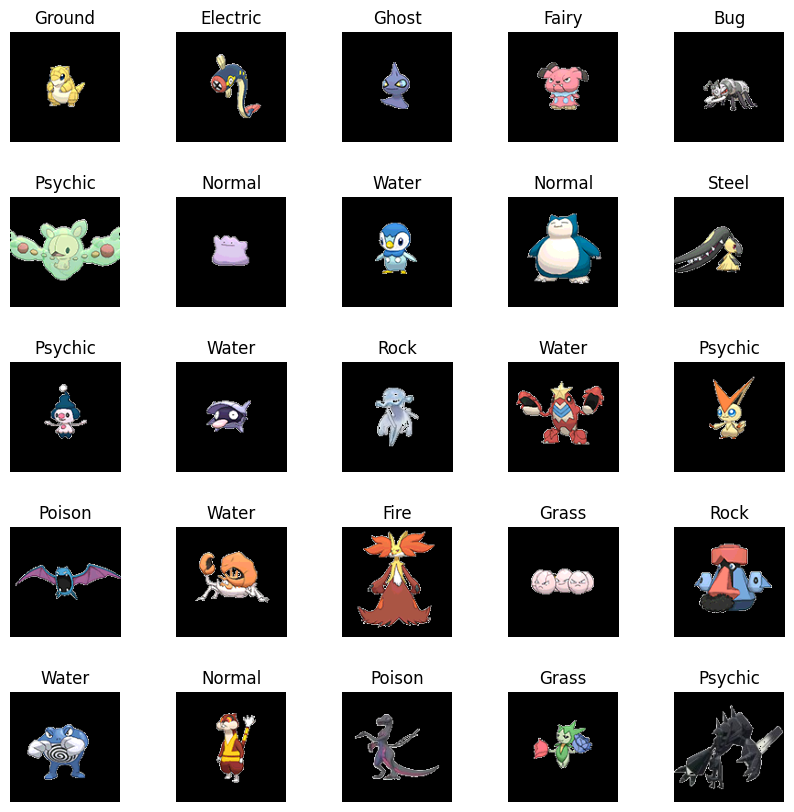

In [54]:
images, labels = next(data_iter)
next(data_iter)
PlotImages(0,batch_size,5,5,images,labels,color=True)